## Jingrong Tian

### Question 1

In [7]:
import json
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
#define logit function
def logit(x):
    return 1/(1+np.exp(-x))

In [8]:
def logistic_objective(x,y):
    def f(b):
        fun=sum(np.log(1+np.exp(-y*(b[0]+b[1]*x))))/len(x)
        return fun
    return f
#    log=lambda b:sum(np.log(1+np.exp(-y*(b[0]+b[1]*x))))/n


In [9]:
def dlogistic_objective(x,y):
    def df(b):
        gradient=np.zeros(2)
        gradient[0]=sum(-y/(np.exp(y*(b[0]+b[1]*x))+1))/len(x)
        gradient[1]=sum(-x*y/(np.exp(y*(b[0]+b[1]*x))+1))/len(x)
        return gradient
    return df


In [10]:
def d2logistic_objective(x,y):
    def d2f(b):
        h=np.zeros((2,2))
        h[0,0]=sum(y**2*np.exp(y*(b[0]+b[1]*x))/(1+np.exp(y*(b[0]+b[1]*x)))**2)/len(x)
        h[0,1]=sum(x*y**2*np.exp(y*(b[0]+b[1]*x))/(1+np.exp(y*(b[0]+b[1]*x)))**2)/len(x)
        h[1,0]=sum(x*y**2*np.exp(y*(b[0]+b[1]*x))/(1+np.exp(y*(b[0]+b[1]*x)))**2)/len(x)
        h[1,1]=sum(x**2*y**2*np.exp(y*(b[0]+b[1]*x))/(1+np.exp(y*(b[0]+b[1]*x)))**2)/len(x)
        return h
    return d2f
    

In [11]:
def backtracking(x0, dx, f, df0, alpha=0.2, beta=0.8, verbose=False):
    '''
    Backtracking for general functions with illustrations
    :param x0: Previous point from backtracking, or initial guess
    :param dx: Incremental factor for updating x0
    :param f: Objective function
    :param df0: Gradient of f at x0
    :param alpha: Sloping factor of stopping criterion
    :param beta: "Agressiveness" parameter for backtracking steps
    :param verbose: Boolean for providing plots and data
    :return: x1, the next iterate in backtracking
    '''

    # Note that the definition below requires that dx and df0 have the same shape
    delta = alpha * np.sum(dx * df0) # A general, but memory intensive inner product
    
    t = 1 # Initialize t=beta^0
    f0 = f(x0) # Evaluate for future use
    x = x0 + dx # Initialize x_{0, inner}
    fx = f(x)
    
    if verbose:
        n=0
        xs = [x]
        fs = [fx]
        ts = [1] * 3
    
    while (not np.isfinite(fx)) or f0 + delta * t < fx:
        t = beta * t
        x = x0 + t * dx
        fx = f(x)
    ###################################### 
        if verbose:
            n += 1
            xs.append(x)
            fs.append(fx)
            ts.append(t)
            ts.pop(0)
            
    if verbose:
        # Display the function along the line search direction as a function of t
        s = np.linspace(-0.1*ts[-1], 1.1*ts[0], 100)
        xi = [0, 1.1*ts[0]]
        fxi = [f0, f0 + 1.1*ts[0]*delta]   
        y = np.zeros(len(s))
        
        for i in range(len(s)):
            y[i] = f(x0 + s[i]*dx) # Slow for vectorized functions

        plt.figure('Backtracking illustration')
        arm, =plt.plot(xi, fxi, '--', label='Armijo Criterion')
        fcn, =plt.plot(s, y, label='Objective Function')
        plt.plot([s[0], s[-1]], [0, 0], 'k--')
        pts =plt.scatter(ts, [0 for p in ts], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        plt.scatter(ts, [f(x0 + q*dx) for q in ts] , label='Backtracking values for n=%d, %d, %d' % (n, n+1, n+2))
        init =plt.scatter([0], [f0], color='black', label='Initial point')
        plt.xlabel('$t$')
        plt.ylabel('$f(x^{(k)}+t\Delta x^{(k+1)})$')
        plt.legend(handles=[arm, fcn, pts, init])
        plt.show()
        
        return x, xs, fs
    
    else:
        return x

In [7]:

def backtracking(x0, dx, f, df0, alpha=0.2, beta=0.8, verbose=False):
    '''
    Backtracking for general functions with illustrations
    :param x0: Previous point from backtracking, or initial guess
    :param dx: Incremental factor for updating x0
    :param f: Objective function
    :param df0: Gradient of f at x0
    :param alpha: Sloping factor of stopping criterion
    :param beta: "Agressiveness" parameter for backtracking steps
    :param verbose: Boolean for providing plots and data
    :return: x1, the next iterate in backtracking
    '''

    # Note that the definition below requires that dx and df0 have the same shape
    delta = alpha * np.sum(dx * df0) # A general, but memory intensive inner product
    
    t = 1 # Initialize t=beta^0
    f0 = f(x0) # Evaluate for future use
    x = x0 + dx # Initialize x_{0, inner}
    fx = f(x)
    
    if verbose:
        n=0
        xs = [x]
        fs = [fx]
        ts = [1] * 3
    
    while (not np.isfinite(fx)) or f0 + delta * t < fx:
        t = beta * t
        x = x0 + t * dx
        fx = f(x)
    ###################################### 
    
        if verbose:
            n += 1
            xs.append(x)
            fs.append(fx)
            ts.append(t)
            ts.pop(0)
            
    if verbose:
        # Display the function along the line search direction as a function of t
        s = np.linspace(-0.1*ts[-1], 1.1*ts[0], 100)
        xi = [0, 1.1*ts[0]]
        fxi = [f0, f0 + 1.1*ts[0]*delta]   
        y = np.zeros(len(s))
        
        for i in range(len(s)):
            y[i] = f(x0 + s[i]*dx) # Slow for vectorized functions

        plt.figure('Backtracking illustration')
        arm, =plt.plot(xi, fxi, '--', label='Armijo Criterion')
        fcn, =plt.plot(s, y, label='Objective Function')
        plt.plot([s[0], s[-1]], [0, 0], 'k--')
        pts =plt.scatter(ts, [0 for p in ts], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        plt.scatter(ts, [f(x0 + q*dx) for q in ts] , label='Backtracking values for n=%d, %d, %d' % (n, n+1, n+2))
        init =plt.scatter([0], [f0], color='black', label='Initial point')
        plt.xlabel('$t$')
        plt.ylabel('$f(x^{(k)}+t\Delta x^{(k+1)})$')
        plt.legend(handles=[arm, fcn, pts, init])
        plt.show()
        
        return x, xs, fs
    
    else:
        return x
    
    

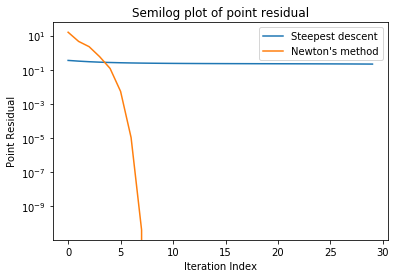

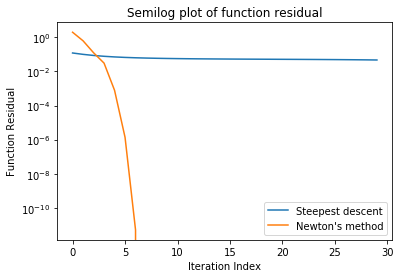

In [13]:
def convergence(f,df,d2f,x0,iter):
    dx_newt = lambda b:- np.linalg.solve(d2f(b), df(b))
    
    sdpoint_res=[]
    sdfunction_res=[]
    x = x0
    for i in range(iter):
        x_pre=x
        x = backtracking(x,-df(x),f,df(x))
        sdpoint_res.append(np.linalg.norm(x-x_pre))
        sdfunction_res.append(np.linalg.norm(f(x)-f(x_pre)))
        
    nmpoint_res=[]
    nmfunction_res=[]
    x = x0
    for i in range(iter):
        x_pre=x
        x = backtracking(x,dx_newt(x),f,df(x))
        nmpoint_res.append(np.linalg.norm(x-x_pre))
        nmfunction_res.append(np.linalg.norm(f(x)-f(x_pre)))
        
        
    # Point Residual
    sd, =plt.semilogy(sdpoint_res, label='Steepest descent')
    nm, =plt.semilogy(nmpoint_res, label='Newton\'s method')
    plt.xlabel('Iteration Index')
    plt.ylabel('Point Residual')
    plt.legend(handles=[sd, nm])
    plt.title('Semilog plot of point residual')
    plt.show()
    
    # Function Residual
    sd, =plt.semilogy(sdfunction_res, label='Steepest descent')
    nm, =plt.semilogy(nmfunction_res, label='Newton\'s method')
    plt.xlabel('Iteration Index')
    plt.ylabel('Function Residual')
    plt.legend(handles=[sd, nm])
    plt.title('Semilog plot of function residual')
    plt.show()
    
    
X=np.array([-1,-1,-1,0,0,0,1,1,1,1])
Y=np.array([-1,-1,-1,1,-1,1,1,1,1,-1])
B=np.array([10,10])
f=logistic_objective(X,Y)
df=dlogistic_objective(X,Y)
d2f=d2logistic_objective(X,Y)

#print(f(B),df(B),d2f(B))

convergence(f,df,d2f,B,30)



### Question 2(a)

Objective and the inequality constraints

$ f(x) = 2x+3y$, $h_1 (x) = -x-1\leq 0$,  $h_2 (x) = x-1 \leq 0$, $h_3 (x) = y-1 \leq 0$, $h_4 (x) = -1-y \leq0$

KKT Conditions as following


1.Stationarity $ \begin{pmatrix}2\\3 \end{pmatrix} +\lambda_1 \begin{pmatrix}-1\\0 \end{pmatrix} +\lambda_2 \begin{pmatrix}1\\0 \end{pmatrix} + \lambda_3 \begin{pmatrix}0\\1 \end{pmatrix}+\lambda_4 \begin{pmatrix}0\\-1 \end{pmatrix}$


2. Primal feasibility $h_1 (x^*) \leq 0$, $h_2 (x^*) \leq 0$, $h_3 (x^*) \leq 0$, $h_4 (x^*) \leq 0$


3. Dual feasibility $\lambda_1 \geq 0$, $\lambda_2 \geq 0$, $\lambda_3 \geq 0$, $\lambda_4 \geq 0$


4. Complementary slackness $\lambda_1 h_1(x^*)=0$, $\lambda_2 h_2(x^*)=0$, $\lambda_3 h_3(x^*)=0$, $\lambda_4 h_4(x^*)=0$


### Question 2(b)

The feasible region is a square with four vertices on (-1,-1), (1,1), (1,-1), (-1,1).
There are nine cases to consider, four vertices, four sides, and the inner point in which $\lambda_i=0$ for all i

1. $\lambda_i=0$, stationarity condition not satisfied since $\nabla f(x)=\begin{pmatrix}2\\3 \end{pmatrix} \neq \textbf{0}$

2. check four vertices: 

(1,1) pairing with $\lambda_1=\lambda_4=0=$

(1,-1) pairing with $\lambda_1=\lambda_3=0$

(-1,1) pairng with $\lambda_2=\lambda_4=0$ 

(-1,-1) pairing with $\lambda_2=\lambda_3=0$

By stationarity, $2-\lambda_1+\lambda_2=0$, $3-\lambda_3+\lambda_4=0$

(1,1) results $\lambda_2=-2$,$\lambda_3=-3$ which does not satisfy dual feasibility.

same thing happens with all vertices that contain 1 as entries. Therefore, the only value left to check is (-1,-1). Since the point is on the boundary, it satisfies primal feasibility. By choosing (-1,-1) we have, $\lambda_1=2$, $\lambda_4=3$, $\lambda_2=\lambda_3=0$. Dual feasibility and Stationarity satisfied. Complementary slackness satisfied as whenever $\lambda_i=0$,$h_i \neq 0$ or $h_i=0$, $\lambda_i \neq 0$


3. check four sides

Top Side--> $\lambda_1=\lambda_2=\lambda_4=0$, $\lambda_3=-3$ Dual feasibility Not satisfied

right Side-->$\lambda_1=\lambda_3=\lambda_4=0$, $\lambda_2=-2$ Dual feasibility Not satisfied

Left Side-->$\lambda_3=\lambda_2=\lambda_4=0$, $\lambda_1=2$ Stationarity Not Satisfied

Bottom Side-->$\lambda_1=\lambda_2=\lambda_3=0$, $\lambda_4=3$ Sationarity Not Satisfied

All nine cases checked, only (-1,-1) satisfies all KKT Conditions


### Question 2(c)
$\textbf{x}=(0,0)$

$\textbf{B}(\textbf{x},\epsilon)\subseteq {x\in[-1,1]}\times{ y\in[-1,1] }$ 

Thus (0,0) is an interior point.

In [11]:
fun = lambda x: (x[0])*2 + (x[1])*3
dfun = lambda x: np.array([2,3])

def h(t,x):
    h = (1/t)*(np.log(1-x[0])+np.log(1+x[0])+np.log(1-x[1])+np.log(1+x[1]))
    return h
def gradient(t,x):
    gd = np.zeros(2)
    gd[0] = 2-(1/t)*2*x[0]/(x[0]**2-1)
    gd[1] = 3-(1/t)*2*x[1]/(x[1]**2-1)
    return gd

#hessian for whole objective
def hessian(t,x):
    h=np.zeros((2,2))
    h[0,0]=(1/t)*2*(x[0]**2+1)/((x[0]**2-1)**2)
    h[0,1]=0
    h[1,0]=0
    h[1,1]=(1/t)*2*(x[1]**2+1)/((x[1]**2-1)**2)
    return h

alpha = 0.2
beta = 0.8    

#first outer
lb1 = lambda x: fun(x) - h(1,x)
dlb1 = lambda x: gradient(1,x)
delta = lambda x: -np.linalg.solve(hessian(1,x),dlb1(x))

x1 = np.zeros((3, 4))
x1[:2,0] = np.array([0, 0])

x1[:2, 1] = backtracking(x1[:2,0], delta(x1[:2,0]), lb1, dlb1(x1[:2,0]), alpha, beta)
x1[:2, 2] = backtracking(x1[:2,1], delta(x1[:2,1]), lb1, dlb1(x1[:2,1]), alpha, beta)
x1[:2, 3] = backtracking(x1[:2,2], delta(x1[:2,2]), lb1, dlb1(x1[:2,2]), alpha, beta)
print(x1)

#second outer
lb1 = lambda x: fun(x) - h(10,x)
dlb1 = lambda x: gradient(10,x)
delta = lambda x: -np.linalg.solve(hessian(10,x),dlb1(x))

x2 = np.zeros((3, 4))
x2[:2,0] = x1[:2, 3]

x2[:2, 1]= backtracking(x2[:2,0], delta(x2[:2,0]), lb1, dlb1(x2[:2,0]), alpha, beta)
x2[:2, 2] = backtracking(x2[:2,1], delta(x2[:2,1]), lb1, dlb1(x2[:2,1]), alpha, beta)
x2[:2, 3] = backtracking(x2[:2,2], delta(x2[:2,2]), lb1, dlb1(x2[:2,2]), alpha, beta)
print(x2)


#third outer
lb1 = lambda x: fun(x) - h(10,x)
dlb1 = lambda x: gradient(10,x)
delta = lambda x: -np.linalg.solve(hessian(10,x),dlb1(x))

x3 = np.zeros((3, 4))
x3[:2,0] = x2[:2, 3]

x3[:2, 1] = backtracking(x3[:2,0], delta(x3[:2,0]), lb1, dlb1(x3[:2,0]), alpha, beta)
x3[:2, 2] = backtracking(x3[:2,1], delta(x3[:2,1]), lb1, dlb1(x3[:2,1]), alpha, beta)
x3[:2, 3] = backtracking(x3[:2,2], delta(x3[:2,2]), lb1, dlb1(x3[:2,2]), alpha, beta)
print(x3)

#fourth outer
lb1 = lambda x: fun(x) - h(100,x)
dlb1 = lambda x: gradient(100,x)
delta = lambda x: -np.linalg.solve(hessian(100,x),dlb1(x))

x4 = np.zeros((3, 4))
x4[:2,0] = x3[:2, 3]

x4[:2, 1] = backtracking(x4[:2,0], delta(x4[:2,0]), lb1, dlb1(x4[:2,0]), alpha, beta)
x4[:2, 2] = backtracking(x4[:2,1], delta(x4[:2,1]), lb1, dlb1(x4[:2,1]), alpha, beta)
x4[:2, 3] = backtracking(x4[:2,2], delta(x4[:2,2]), lb1, dlb1(x4[:2,2]), alpha, beta)
print(x4)

#fifth outer
lb1 = lambda x: fun(x) - h(1000,x)
dlb1 = lambda x: gradient(1000,x)
delta = lambda x: -np.linalg.solve(hessian(1000,x),dlb1(x))

x5 = np.zeros((3, 4))
x5[:2,0] = x5[:2, 3]

x5[:2, 1] = backtracking(x5[:2,0], delta(x5[:2,0]), lb1, dlb1(x5[:2,0]), alpha, beta)
x5[:2, 2] = backtracking(x5[:2,1], delta(x5[:2,1]), lb1, dlb1(x5[:2,1]), alpha, beta)
x5[:2, 3] = backtracking(x5[:2,2], delta(x5[:2,2]), lb1, dlb1(x5[:2,2]), alpha, beta)
print(x4)



[[ 0.         -0.64       -0.61922543 -0.61803746]
 [ 0.         -0.96       -0.92563064 -0.87080766]
 [ 0.          0.          0.          0.        ]]
[[-0.61803746 -0.95190313 -0.95157281 -0.95125137]
 [-0.87080766 -0.92162832 -0.97738875 -0.97037503]
 [ 0.          0.          0.          0.        ]]
[[-0.95125137 -0.95124922 -0.95124922 -0.95124922]
 [-0.97037503 -0.96752529 -0.96722487 -0.96722207]
 [ 0.          0.          0.          0.        ]]
[[-0.95124922 -0.9971547  -0.9959326  -0.99518224]
 [-0.96722207 -0.99836118 -0.99752942 -0.99689303]
 [ 0.          0.          0.          0.        ]]
[[-0.95124922 -0.9971547  -0.9959326  -0.99518224]
 [-0.96722207 -0.99836118 -0.99752942 -0.99689303]
 [ 0.          0.          0.          0.        ]]


/Users/tianjingrong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/tianjingrong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
